In [1]:
!pip install -Uq dicomsdl

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import dicomsdl as dicom
from tqdm.notebook import tqdm, trange
from joblib import Parallel, delayed
from preprocess import MammoPreprocessorCBISDDSM

%matplotlib inline

In [3]:
img_path = "/kaggle/input/masstraining-full-mammogram-images/CBIS-DDSM"
masks = "/kaggle/input/masstraining-roimask-and-crpped-images/CBIS-DDSM"
mammo_imgs_csv = "/kaggle/input/creating-a-metadata-dataframe/full_mammo_imgs.csv"
masks_csv = "/kaggle/input/creating-a-metadata-dataframe/roimask_cropped_df.csv"
case_desc_csv = "/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv"

In [4]:
%time
dst = MammoPreprocessorCBISDDSM(img_path, masks, 
               mammo_imgs_csv, masks_csv, case_desc_csv, image_size=(4096,2048), patch_size=(256,256))

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs


In [5]:
i = np.random.randint(0, len(dst.images))
example = dst.images[i]
raw_img = dicom.open(example).pixelData()

In [6]:
dst.preprocess_image(example)

processed_img_path = glob.glob("/kaggle/working/CBIS_DDSM/*/*_mammo.png")[0]
process_mask_path = processed_img_path.replace("mammo", "mask")
processed_img = cv2.imread(processed_img_path, 0)
processed_mask = cv2.imread(process_mask_path,0)

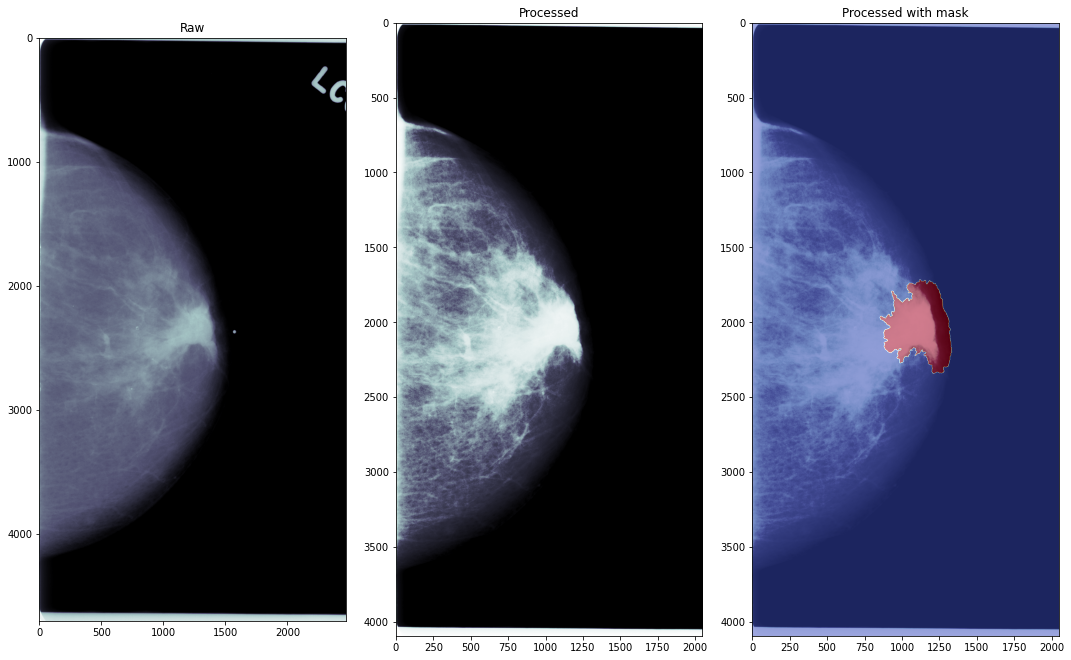

In [7]:
_, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,10))

axs[0].imshow(raw_img, cmap="bone")
axs[0].set_title("Raw")

axs[1].imshow(processed_img, cmap="bone")
axs[1].set_title("Processed")

axs[2].imshow(processed_img, cmap="bone")
axs[2].imshow(processed_mask, alpha=0.50, cmap="coolwarm")
axs[2].set_title("Processed with mask")

plt.tight_layout();

In [8]:
dst.preprocess_all("png")

  0%|          | 0/1231 [00:00<?, ?it/s]

Parallel preprocessing done!
